In [3]:
# Some of the code is from: 

# Spectrum and cepstrum: http://flothesof.github.io/cepstrum-pitch-tracking.html
# Spectrum: https://www.cbcity.de/die-fft-mit-python-einfach-erklaert
# cepstrum https://github.com/python-acoustics/python-acoustics/blob/master/acoustics/cepstrum.py
# MFCC: https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
# MFCC: https://github.com/IlyaMichlin/MFCC/blob/master/MFCC.ipynb
# source: https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html
# https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
# http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/
# https://medium.com/tencent-thailand/music-information-retrieval-part-1-using-librosa-to-extract-audio-features-6e8569537185


In [4]:
import os
import pandas as pd
import soundfile as sf   
import math 
import scipy.io.wavfile
import io 
import numpy as np 
import scipy.fftpack as fftpack 
from scipy import signal
import urllib.request as request  # We use this one to get things from the web
import matplotlib.pyplot as plt  
import librosa
import librosa.display


In [5]:
savefig = True #if False, it won't save figures in case you dont want to overwrite
input_dir = './data/input/'
output_dir = './data/output/figures/fig1/'
try: os.mkdir(output_dir)
except: pass

# Choose a wav file
wav_name = 'rainbow'

In [6]:

fs, signal = scipy.io.wavfile.read(input_dir+f'{wav_name}.wav')  # File assumed to be in the same directory
audio_length = len(signal)/fs 
print(f'length {np.round(audio_length,2)} seconds')
signal = signal[0:int(3.5 * fs)]  # Keep the first 3.5 seconds

length 0.75 seconds


# Plot waveform

In [7]:
# Load f0 and instensity in case you want to plot on top of the waveform

f0 = pd.read_csv(input_dir+'rainbow_f0.txt', sep=' ') #obtained from praat
f0 = f0.F0_Hz.values
intensity = pd.read_csv(input_dir+'rainbow_intensity.txt', sep=' ') #obtained from praat
intensity = intensity.Intensity_dB.values

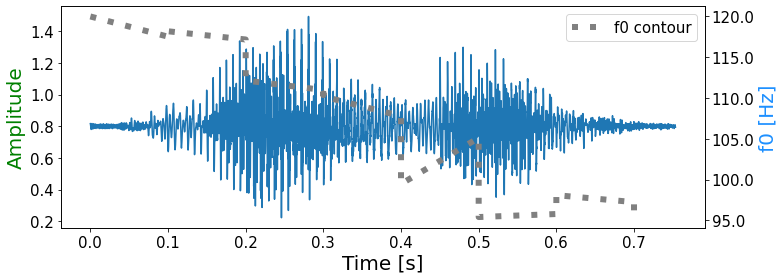

In [8]:
# for spectrogram and MFCCs, use full version
# full version

savefig = True
start = 0
duration = audio_length
signal_all = signal[int(start*fs):int((start+duration)*fs)]

signal_to_plot = signal_all.copy()


p_timeaxis = np.linspace(start,start+duration,len(signal_to_plot))

fontsize = 20
ticksize = 15
fig = plt.figure(figsize=(11,4))

axes1 = fig.add_subplot(111)
axes1.plot(p_timeaxis,signal_to_plot)
max_xaxis = audio_length+0.1

axes1.set_ylabel('Amplitude', fontsize = fontsize, color='green')
axes1.set_ylabel('Amplitude', fontsize = fontsize, color='green')
axes1.set_yticklabels(labels = np.round(np.arange(0,2.2,0.2),1) , Fontsize=ticksize)
axes1.set_xticklabels(labels = np.round(np.arange(-0.1,audio_length+0.1, 0.1),1), Fontsize=ticksize)

plt.xlabel('Time [s]', fontsize = fontsize)

axes2 = axes1.twinx()   # mirror them


# axes1.plot(p_timeaxis[::500],[np.max(np.abs(n)) for n in signal_to_plot][::500], color='gray', linestyle='-', linewidth=3, label='Intensity contour')
axes2.set_ylabel('f0 [Hz]',  fontsize = fontsize, color='dodgerblue', rotation = 90)
axes2.plot(np.round(np.arange(0,audio_length, 0.0115),1)[4::2],f0[4::2], color='gray', linestyle=(0,(1,2,)), linewidth=6, label='f0 contour')
# axes2.set_yticks(range(len(range(-150,150,20))))
axes2.set_yticklabels(axes2.get_yticks(),Fontsize=ticksize)



# axes1.plot(np.arange(0,max_xaxis,max_xaxis/60)[:-6],(intensity[:-6]-35)**2, color='gray', linestyle='-', linewidth=2, label='Intensity contour')
# axes1.legend(fontsize=15)
# axes2.legend(loc='best',fontsize=15,bbox_to_anchor=(0.5, 0.35, 0.5, 0.5))

axes2.legend(fontsize=15)



# plt.xticks(fontsize=ticksize)
# plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'waveform_full_{wav_name}.png', dpi=300,  facecolor='w')



# Plot zoomed in waveform

In [9]:
# cropped version
# v1: 0.46, 0.1
start = 0.48
duration = 0.1
signal_cropped = signal[int(start*fs):int((start+duration)*fs)]

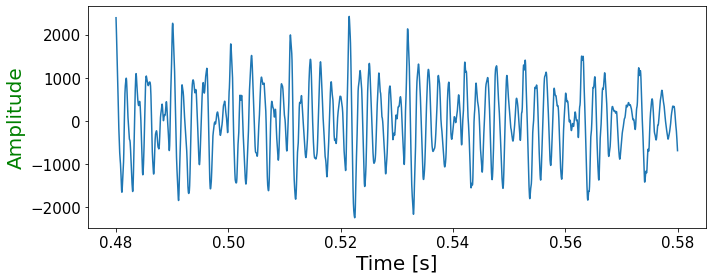

In [10]:


# We'll use the numpy function "linspace" to create a time axis for plotting
p_timeaxis = np.linspace(start,start+duration,len(signal_cropped))

plt.figure(figsize=(10,4))


plt.plot(p_timeaxis,signal_cropped)
fontsize = 20
ticksize = 15
plt.ylabel('Amplitude', fontsize = fontsize, color='green')
plt.xlabel('Time [s]', fontsize = fontsize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'waveform_cropped_{wav_name}.png', dpi=300,  facecolor='w')



# Spectrum

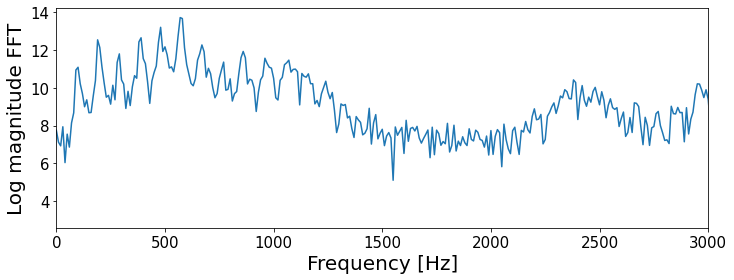

In [11]:
# FFT

sample_freq = 44100 # Hz
frame_size = len(signal_cropped)
windowed_signal = np.hamming(frame_size) * signal_cropped
dt = 1/sample_freq
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal)
X = np.log(np.abs(X))

fig, ax = plt.subplots(figsize = (10.3,4))
ax.plot(freq_vector, X)
plt.ylabel('Log magnitude FFT', fontsize=fontsize)
plt.xlabel('Frequency [Hz]', fontsize=fontsize)
plt.xlim(0,3000)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrum_{wav_name}.png', dpi=300,  facecolor='w')

# Make source spectrum for fig 1-D (right panel)

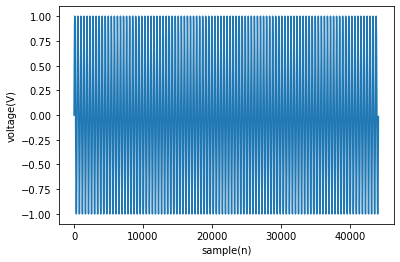

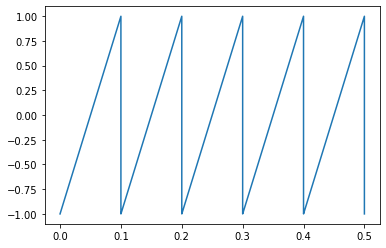

<Figure size 864x288 with 0 Axes>

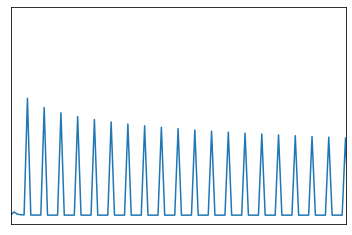

/Users/danielmlow/miniconda3/envs/pydra/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


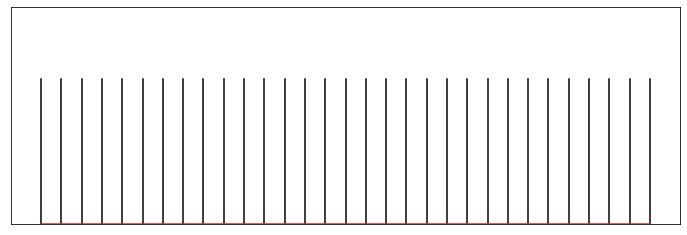

In [12]:

f = 100
sample = fs
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / fs)

plt.plot(x, y)
plt.xlabel('sample(n)')
plt.ylabel('voltage(V)')
plt.show()

from scipy import signal
from pylab import *
x = linspace(1, 80, 512)

# saw wave
t = np.linspace(0, 0.5, fs)
sax = signal.sawtooth(2 * np.pi * 10 * t)
plt.plot(t, sax)

# FFT
frame_size = len(sax) #512, 2048, amon
# windowed_signal = np.hamming(frame_size) * sax
dt = 1/fs
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(sax) #transform
log_X = np.log(np.log(X)) #log abs hamming_windowed_signal
plt.figure(figsize=(12,4))
fig, ax = plt.subplots()
ax.plot(freq_vector,np.log2(np.abs(X)))
ax.set_xlim(0,100)
ax.set_ylim(0,np.max(np.log2(np.abs(X)))+10)
plt.yticks(ticks = [], labels=[])
plt.xticks(ticks = [], labels=[])
plt.savefig(output_dir+'spectrum_harmonics_saw.png', dpi=100, facecolor='w')
plt.show()



plt.figure(figsize=(12,4))
x = range(0,3100,100)
plt.stem(x,[4]*len(x), linefmt = 'k-', markerfmt='k ')
plt.ylim(0, 6)
plt.yticks(ticks = [], labels=[])
plt.xticks(ticks = [], labels=[])
# plt.tightlayout()
plt.savefig(output_dir+'spectrum_harmonics.png', dpi=150, facecolor='w')

# Spectrogram

In [13]:
def enframe(x,S,L):
   # w = 0.54*np.ones(L)
    #for n in range(0,L):
     #   w[n] = w[n] - 0.46*math.cos(2*math.pi*n/(L-1))
    w = np.hamming(L)
    frames = []
    nframes = 1+int((len(x)-L)/S)
    for t in range(0,nframes):
        frames.append(np.copy(x[(t*S):(t*S+L)])*w)
    return np.array(frames)

def stft(frames,N,Fs):
    stft_frames = [ fftpack.fft(x,N) for x in frames]
    freq_axis = np.linspace(0,Fs,N)
    return(stft_frames, freq_axis)

def stft2level(stft_spectra,max_freq_bin):
    magnitude_spectra = [ abs(x) for x in stft_spectra ]
    max_magnitude = max([ max(x) for x in magnitude_spectra ])
    min_magnitude = max_magnitude / 1000.0
    for t in range(0,len(magnitude_spectra)):
        for k in range(0,len(magnitude_spectra[t])):
            magnitude_spectra[t][k] /= min_magnitude
            if magnitude_spectra[t][k] < 1:
                magnitude_spectra[t][k] = 1
    level_spectra = [ 20*np.log10(x[0:max_freq_bin]) for x in magnitude_spectra ]
    return(level_spectra)


def sgram(x,frame_skip,frame_length,fft_length, fs, max_freq):
    frames = enframe(x,frame_skip,frame_length)
    (spectra, freq_axis) = stft(frames, fft_length, fs)
    sgram = stft2level(spectra, int(max_freq*fft_length/fs))
    max_time = len(frames)*frame_skip/fs
    return(sgram, max_time, max_freq)



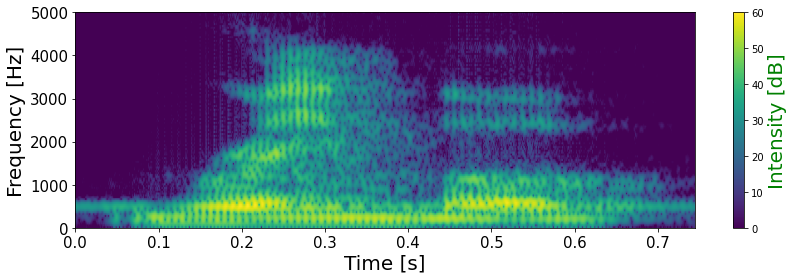

In [14]:
# broadband 002, 004


plot_formants = False

window = 0.010 #(0.010 = 10 msec)

(p_sgram, p_maxtime, p_maxfreq) = sgram(signal_all, int(0.001*fs), int(window*fs), 1024, fs, 5000)
plt.figure(figsize=(12,4))


plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
plt.ylabel('Frequency [Hz]', fontsize = fontsize)
plt.xlabel('Time [s]', fontsize = fontsize)

plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)

if plot_formants:
    for col in formants.columns.drop('F4_Hz'):
        plt.plot(range(formants.shape[0]),formants[col].values, color='crimson', linestyle='dashed')

cbar = plt.colorbar()
cbar.set_label('Intensity [dB]', rotation=90, color='green', fontsize=fontsize)




plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrogram_broadband_{wav_name}.png', dpi=300,  facecolor='w')






### Narrowband 
A narrowband spectrogram is created using a window which is longer than  2T0 (2 x pitch period). For example, the spectrogram below is narrowband, since  35 ms is longer than  T0  of the female speaker. In a narrowband spectrogram, each individual spectral slice has harmonics of the pitch frequency. Therefore you can estimate the pitch frequency by counting the number of harmonics below 1000Hz. In this case, there are 4 harmonics below 1000Hz, so the pitch frequency is about  F0=1000/4=250 Hz. That matches, very well, the pitch period of  T0=4 ms that we estimated before.

**F0 = 1000/(number of harmonics below 1000)**





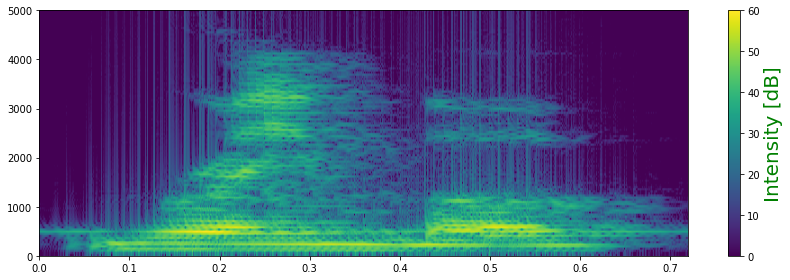

In [15]:
# narrowband 0.001, 2T0: 2 times pitch period (10msec for lower pitch voice, 4 for higher): 0.035

(p_sgram, p_maxtime, p_maxfreq) = sgram(signal_all, int(0.001*fs), int(0.035*fs), 1024, fs, 5000)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(np.array(p_sgram)),origin='lower',extent=(0,p_maxtime,0,p_maxfreq),aspect='auto')
cbar = plt.colorbar()
cbar.set_label('Intensity [dB]', rotation=90, color='green', fontsize=fontsize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrogram_narrowband_{wav_name}.png', dpi=300,  facecolor='w')


# Cepstrum and mel-cepstrum


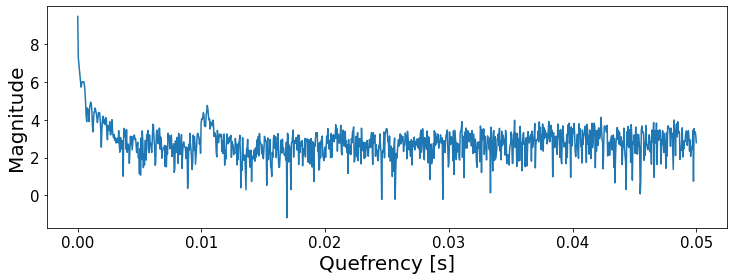

In [16]:
# cepstrum
'''

1/f0 = peak

1/97 = 


'''

sample_freq = 44100 # Hz
frame_size = len(signal_cropped)
windowed_signal = np.hamming(frame_size) * signal_cropped
dt = 1/sample_freq
from scipy.fftpack import dct
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal)
# X = dct(windowed_signal)
X = np.abs(X)



# cepstrum = abs(w_stft[window]) #you can also take the log
log_X = np.log(X)
# log_X = X
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)



fig, ax = plt.subplots(figsize = (10.3,4))

ax.plot(quefrency_vector,np.log(abs(cepstrum)))
ax.set_xlabel('Quefrency [s]', fontsize=fontsize)
ax.set_ylabel('Magnitude', fontsize=fontsize)


# ax.set_xlim(-0.0001,0.02)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'cepstrum_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticks(fontsize=ticksize)

# Mel filters
https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0


In [17]:
timestep_4_mfcc_coefficient =int(np.round(1104*3/65))
print(timestep_4_mfcc_coefficient)

51


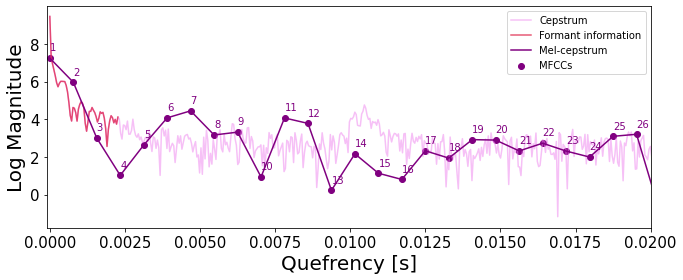

In [18]:
# cepstrum
'''

1/f0 = peak

1/98 = 0.0102 


'''

sr=fs
n_fft= len(X)*2 #Double check
n_mels = 128


# Cepstrum
log_X = np.log(X)
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

# Mel-cepstrum
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels) # Mel filter the spectrum X
X_mel_filtered = mel[:,:-1].dot(X) #filtered
log_X = np.log(X_mel_filtered)

from scipy.fftpack import dct
mel_cepstrum = dct(log_X)[:65]
# mel_cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
mel_quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots(figsize = (9.6,4))
ax.plot(quefrency_vector,np.log(abs(cepstrum)), label='Cepstrum', alpha=0.5, color = 'violet')

ax.plot(quefrency_vector[:timestep_4_mfcc_coefficient],np.log(abs(cepstrum))[:timestep_4_mfcc_coefficient], label='Formant information', alpha=0.7, color = 'crimson')

ax.plot(mel_quefrency_vector,np.log(abs(mel_cepstrum)), label='Mel-cepstrum', color = 'purple',)

ax.scatter(mel_quefrency_vector,np.log(abs(mel_cepstrum)), label='MFCCs', color = 'purple')

strings = [str(n) for n in list(range(1,len(mel_quefrency_vector)+1))]
for number, (x, y) in enumerate(zip(mel_quefrency_vector[:26], np.log(abs(mel_cepstrum))[:26])):
            ax.text(x,y+0.4,s=str(number+1),color = 'purple')

ax.set_xlabel('Quefrency [s]', fontsize=fontsize)
ax.set_ylabel('Log Magnitude', fontsize=fontsize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.xlim(-0.0001,0.02)
plt.legend()
# plt.legend(['Cepstrum','Formant information','Mel-cepstrum', 'MFCCs'])
plt.tight_layout()

if savefig:
    plt.savefig(output_dir+f'mel-cepstrum_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticks(fontsize=ticksize)

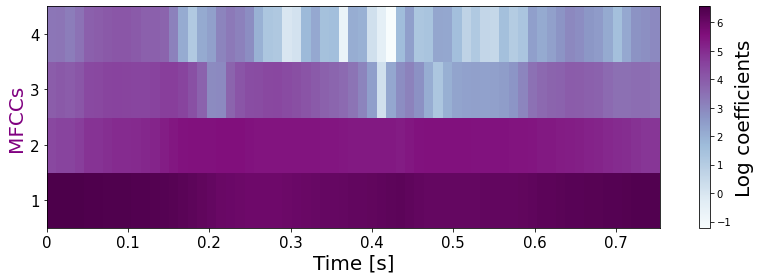

In [19]:
plt.figure(figsize=(11.5,4))

signal, fs = librosa.load(input_dir+'rainbow.wav', sr=44100)
mfccs = librosa.feature.mfcc(y=signal, sr=fs, n_mfcc=4)
mfccs= np.log(np.abs(mfccs))
ax = librosa.display.specshow(mfccs, sr=fs, x_axis='time', cmap='BuPu')
# fig.axis('on')
plt.ylabel('MFCCs', fontsize = fontsize, color='purple')
plt.xlabel('Time [s]', fontsize = fontsize)
ax.axes.set_yticks(np.arange(0.5,4.5),)
ax.axes.set_yticklabels(range(1,5))
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
cbar = plt.colorbar()
cbar.set_label('Log coefficients', rotation=90, color='black', fontsize=fontsize)

plt.tight_layout()
if savefig: 
    plt.savefig(output_dir+f'mel-spectrogram_{wav_name}.png', dpi=300,  facecolor='w')
# ax.set_yticklabels(range(1,5))

# Other

# STFT spectrum

# Windowing
Frame: assuming signal is periodic

Window: to make signal continuous and avoid high frequency distortions


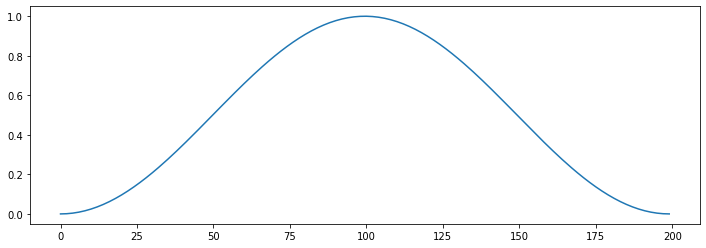

In [20]:
w = np.hanning(200)
plt.figure(figsize=(12,4))
plt.plot(w)

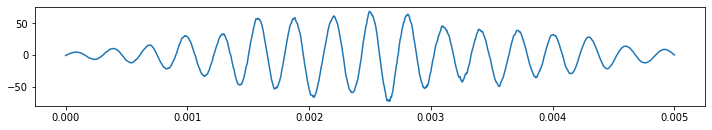

In [21]:
# Example of applying enframe to enframe to windows of 35 ms
window = 10
w_frames = enframe(signal_all,int(0.001*fs),int(0.035*fs))
plt.figure(figsize=(12,4))

plt.subplot(211)
plt.plot(np.linspace(0,0.005,len(w_frames[window])),w_frames[window])

(0.0, 3000.0)

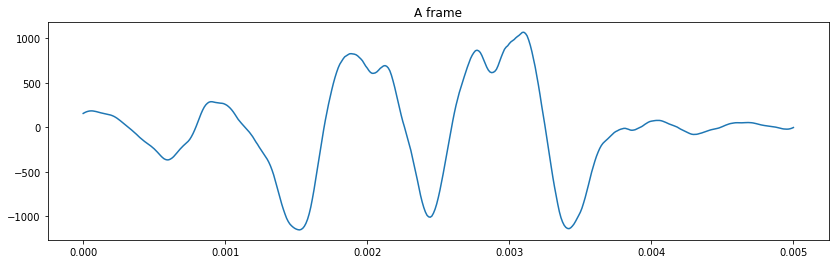

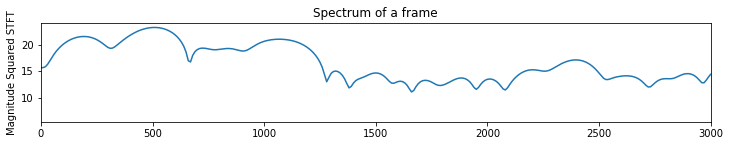

In [22]:
w_frames = enframe(signal_cropped,int(0.001*fs),int(0.010*fs))

plt.figure(figsize=(14,4))
plt.plot(np.linspace(0,0.005,len(w_frames[window])),w_frames[window])
plt.title('A frame')




# spectrum
(w_stft, w_freqaxis) = stft(w_frames, len(signal_cropped), fs)
plt.figure(figsize=(12,4))
plt.subplot(211)
plt.plot(w_freqaxis,np.log(np.maximum(1,abs(w_stft[window])**2)))
plt.ylabel('Magnitude Squared STFT')
plt.title('Spectrum of a frame')
plt.xlim(0,3000)

In [23]:
def stft(frames,N,Fs):
    stft_frames = [ fftpack.fft(x,N) for x in frames]
    freq_axis = np.linspace(0,Fs,N)
    return(stft_frames, freq_axis)


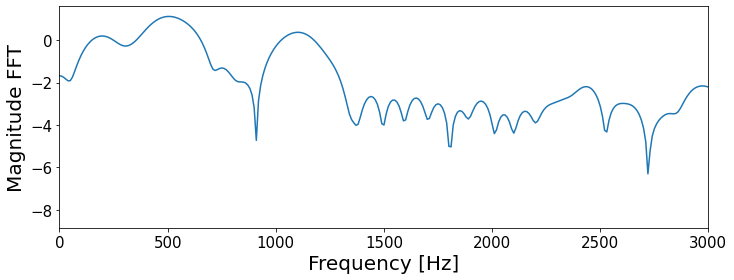

In [24]:
# Spectrum option B
# https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms1_wideband_narrowband.html

# If I instead do a Short-time Fourier transform for each 10msec frame at N different frequencies, I get this for one window:

start = 0.47
duration = 0.1
signal_cropped = signal[int(start*fs):int((start+duration)*fs)]



window = 10 #choose a window to plot

w_frames = enframe(signal_cropped,int(0.001*fs),int(0.01*fs))


# spectrum
(w_stft, w_freqaxis) = stft(w_frames, len(signal_cropped), fs)
X_framed = abs(w_stft[window]) #you can also take the log
plt.figure(figsize=(10.3,4))
# plt.stem(w_freqaxis[::10],X[::10])
plt.plot(w_freqaxis,np.log(X_framed))

plt.ylabel('Magnitude FFT', fontsize=fontsize)
plt.xlabel('Frequency [Hz]', fontsize=fontsize)
plt.xlim(0,3000)
plt.xlim(0,3000)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)
plt.tight_layout()
if savefig:
    plt.savefig(output_dir+f'spectrum_window_{wav_name}.png', dpi=300,  facecolor='w')
